# Lab 2: Image Enhancement

In [11]:
import cv2
import os, numpy as np
from matplotlib import pyplot as plt

# Path to directory with images
dataDir = 'Images_03a'

In [2]:
# Open noisy image
img = cv2.imread(os.path.join(dataDir, 'coins_03_noisy.jpg'))

# Show image
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyWindow('image')

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/jose.l.rodrigues/.local/lib/python3.10/site-packages/cv2/qt/plugins"


### 1. Filtering and Smoothing

[Check tutorial here!](https://docs.opencv.org/4.x/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)

In [5]:
# Apply mean filter to the image
img_mean_filter = cv2.blur(img, (4,4))

# Show image
cv2.imshow('image', img_mean_filter)
cv2.waitKey(0)
cv2.destroyWindow('image')

In [4]:
# Apply a Gaussian filter to the image
img_gaussian_filter = cv2.GaussianBlur(img, (5,5), 0)

# Show image
cv2.imshow('image', img_gaussian_filter)
cv2.waitKey(0)
cv2.destroyWindow('image')

Exercise 1.1: Apply median and bilateral filters to the image

In [19]:

img = cv2.imread(os.path.join(dataDir, 'coins_03_noisy.jpg'))

# Apply a median filter to the image
img_median_filter = cv2.medianBlur(img, 3)

# Apply a bilateral filter to the image
# not very good for salt and pepper noise
img_bilateral_filter = cv2.bilateralFilter(img, 5, 100, 150)
img_bilateral_filter = cv2.bilateralFilter(img_bilateral_filter, 5, 100, 150)

# Show image
cv2.imshow('Median Filter', img_median_filter)
cv2.imshow('Bilateral Filter', img_bilateral_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()


Exercise 1.2: Add salt and pepper noise to a grayscale image and check the result of previous filters

In [34]:
import cv2
import os, numpy as np
from matplotlib import pyplot as plt

import numpy as np

# Add salt and pepper noise
def add_sp(image):
    img = image.copy()
    h, w = img.shape[:2]  # Get height and width of the image
    num_pixels = h * w

    num_pixels_to_change = int(0.05 * num_pixels)
    pixels_to_alter = np.random.randint(num_pixels, size=num_pixels_to_change)

    if len(img.shape) == 3:  # Colored image (RGB)
        color = np.random.choice([0, 1], size=(num_pixels_to_change, 3)) * 255  # Generate noise color for each channel
        for i in range(num_pixels_to_change):
            x = pixels_to_alter[i] % w
            y = pixels_to_alter[i] // w
            img[y, x, :] = color[i]  # Apply noise color to each channel separately
    else:  # Grayscale image
        color = np.random.choice([0, 255], size=num_pixels_to_change)  # Generate noise color
        for i in range(num_pixels_to_change):
            x = pixels_to_alter[i] % w
            y = pixels_to_alter[i] // w
            img[y, x] = color[i]  # Apply noise color

    return img


img = cv2.imread(os.path.join(dataDir, 'coins_02.jpg'))
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

grayscale_image = add_sp(grayscale_image)

# Filtering
img_median_filter = cv2.medianBlur(grayscale_image, 3)
img_bilateral_filter = cv2.bilateralFilter(grayscale_image, 5, 100, 150)

cv2.imshow('image', grayscale_image)
cv2.imshow('Median Filter', img_median_filter)
cv2.imshow('Bilateral Filter', img_bilateral_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercise 1.3: Reproduce gaussian blur with custom convolution (using [ndimage.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html))

In [39]:
from scipy import ndimage

import cv2
import os, numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(os.path.join(dataDir, 'coins_02.jpg'))
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

import numpy as np
from scipy import ndimage

def my_convolution(image, kernel):
    # Normalize kernel
    kernel = np.array(kernel)
    if np.sum(kernel) != 0:
        kernel = kernel / np.sum(kernel)

    # Normalize image
    image = image / 255.0

    # Apply convolution
    result = np.zeros_like(image)

    if len(image.shape) == 2:  # Grayscale image
        result[:, :] = ndimage.convolve(image, kernel)
    elif len(image.shape) == 3 and image.shape[2] == 3:  # RGB image
        for i in range(3):  # Apply convolution on each channel
            result[:, :, i] = ndimage.convolve(image[:, :, i], kernel)
    else:
        raise ValueError("Unsupported image format")

    # Normalize result
    result = result / np.max(result)

    return result


convolution_result = my_convolution(grayscale_image, [[1, 2, 1], [2, 4, 2], [1, 2, 1]])

# apply gaussian blur
img_gaussian_blur = cv2.GaussianBlur(grayscale_image, (3,3), 0)

# show results
cv2.imshow('gaussian blur', img_gaussian_blur)
cv2.imshow('convolution', convolution_result)
cv2.imshow('original', grayscale_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercise 1.4: Define custom convolution (using [ndimage.convolve()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html))

In [28]:
img = cv2.imread(os.path.join(dataDir, 'coins_02.jpg'))
grayscale_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

convolution_result = my_convolution(grayscale_image, [[8, 4, 2], [4, 2, 1], [2, 1, 0]])

cv2.imshow('original', grayscale_image)
cv2.imshow('convolution', convolution_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercise 1.5: Add salt and pepper noise to a colored image and apply the previous filters 

In [37]:
img = cv2.imread(os.path.join(dataDir, 'ruben.jpg'))

sp = add_sp(img)

img_median_filter = cv2.medianBlur(sp, 3)
img_bilateral_filter = cv2.bilateralFilter(sp, 5, 100, 150)

cv2.imshow('salt and pepper', sp)
cv2.imshow('median filter', img_median_filter)
cv2.imshow('bilateral filter', img_bilateral_filter)
cv2.waitKey(0)
cv2.destroyAllWindows()

Exercise 1.6: Apply custom filter to colored image with noise

In [43]:
img = cv2.imread(os.path.join(dataDir, 'ruben.jpg'))

sp = add_sp(img)

convolution_result = my_convolution(sp, [[32, 16, 8, 4, 2], [16, 8, 4, 2, 1], [8, 4, 2, 1, 0], [4, 2, 1, 0, -1], [2, 1, 0, -1, -2]])

cv2.imshow('original', img)
cv2.imshow('salt and pepper', sp)
cv2.imshow('convolution', convolution_result)
cv2.imshow('median filter', cv2.medianBlur(sp, 3))
cv2.imshow('bilateral filter', cv2.bilateralFilter(sp, 5, 100, 150))
cv2.waitKey(0)
cv2.destroyAllWindows()

### 2. Histogram Equalization

In [2]:
# Load low contrast image
img = cv2.imread(os.path.join(dataDir, 'face_lowContrast_01.jpg'), 0) # Change this, according to your image's path

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/jose.l.rodrigues/.local/lib/python3.10/site-packages/cv2/qt/plugins"


[Histograms Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e)

In [3]:
# Increasing contrast with Histograms Equalization
img_with_he = cv2.equalizeHist(img)

cv2.imshow('histogram_equalization', img_with_he)
cv2.waitKey(0)
cv2.destroyAllWindows()

[Contrast Limited Adaptive Histogram Equalization](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#gad689d2607b7b3889453804f414ab1018)

In [7]:
# Increasing contrast with CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
img_with_CLAHE = clahe.apply(img)

cv2.imshow('clahe', img_with_CLAHE)
cv2.waitKey(0)
cv2.destroyAllWindows()

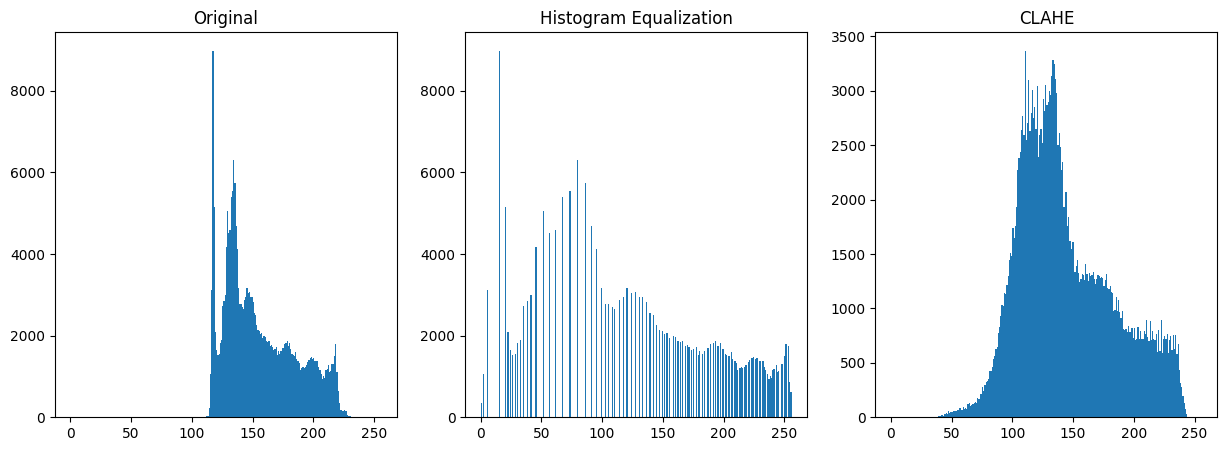

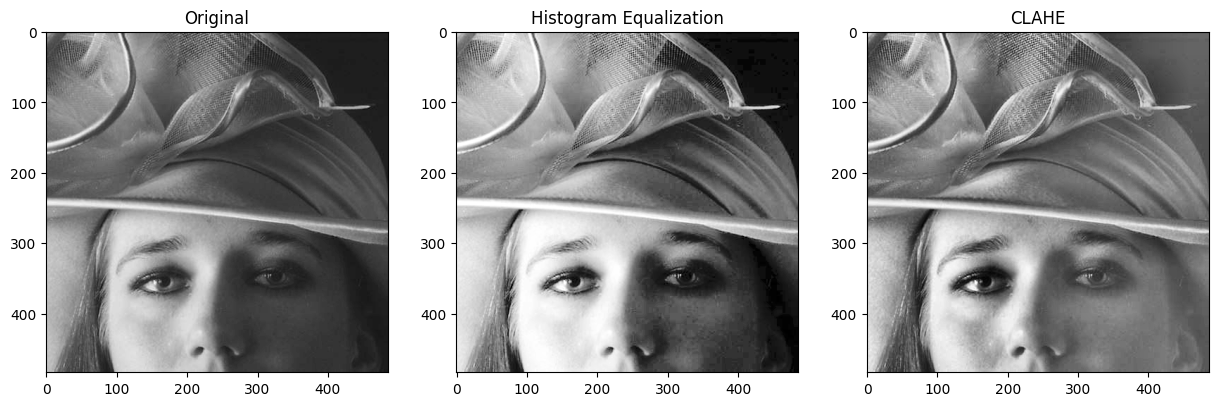

In [6]:
# Comparsion
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].hist(img.ravel(), 256, [0, 256])
ax[0].set_title('Original')

ax[1].hist(img_with_he.ravel(), 256, [0, 256])
ax[1].set_title('Histogram Equalization')

ax[2].hist(img_with_CLAHE.ravel(), 256, [0, 256])
ax[2].set_title('CLAHE')

plt.show()

# Compare images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(img_with_he, cmap='gray')
ax[1].set_title('Histogram Equalization')

ax[2].imshow(img_with_CLAHE, cmap='gray')
ax[2].set_title('CLAHE')

plt.show()


Exercise 2.1: Apply Histogram Equalization to a colored image

Exercise 2.2: Apply CLAHE to a colored image

In [14]:
import cv2
import os

# Load the colored image
img = cv2.imread(os.path.join(dataDir, 'lowContrast_06.jpg'))

# Convert the image to LAB color space
lab_img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Split the LAB image into channels
l, a, b = cv2.split(lab_img)

# Apply histogram equalization to the L channel
l_equalized = cv2.equalizeHist(l)

# Merge the equalized L channel with the original A and B channels
lab_equalized = cv2.merge((l_equalized, a, b))

# Convert the LAB image back to BGR color space
img_with_he = cv2.cvtColor(lab_equalized, cv2.COLOR_LAB2BGR)

# Apply CLAHE to the L channel
clahe = cv2.createCLAHE(clipLimit=5.0, tileGridSize=(16, 16))
l_clahe = clahe.apply(l)

# Merge the CLAHE-enhanced L channel with the original A and B channels
lab_clahe = cv2.merge((l_clahe, a, b))

# Convert the LAB image back to BGR color space
img_with_CLAHE = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

# Comparison
cv2.imshow('Original', img)
cv2.imshow('Histogram Equalization', img_with_he)
cv2.imshow('CLAHE', img_with_CLAHE)
cv2.waitKey(0)
cv2.destroyAllWindows()
